# Data Visualisation - Matthew's Changes

In this lab session, we'll be working in pairs to produce visualize historical weather data.

Two pairs will visualise mean temperature, rainfall, or other data for each of the following stakeholders:

- An activist group asking about droughts in the Murray-Darling basin
- The Nonspecific City Planning council, concerned about possible climate change impacts
- A regional farm cooperative trying to decide what seed crops they should grow for coming years 
- A collector asking for "something more art than science" to hang on a wall

This data has been produced by the Terrestrial Ecosystem Research Network's (TERN) Ecosystem Modelling and Scaling Infrastructure (eMAST) project, using physics-based simulations to fill in the gaps in observations going back to 1970.
Using "reanalysis" techniques like this, we can turn point observations into gridded data!

It's hosted by the [National Computational Infrastructure](https://nci.org.au/) on ANU campus, so access should be fast!  You can [read about the dataset here](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/1ae9f300-1384-4f4c-8984-a4be10fce6a6), and [access it here](http://dap.nci.org.au/thredds/remoteCatalogService?catalog=http://dapds00.nci.org.au/thredds/catalogs/rr9/collection/eMAST-R-Package.xml) (click the variable, dataset, then "1. OPeNDAP" and use the "data URL").  This *is* quite a process, but worth it to access to world-leading research datasets.


## Loading the data

We'll start with some scaffolding code to demonstrate loading the data, then it's over to you to load any other variables that you might be interested in.

# Standard set of imports
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [1]:
# As usual, we start with our standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# And for remote sensing, we add Xarray - it's inspired by Pandas, and designed
# to handle groups of multi-dimensional arrays.  See http://xarray.pydata.org/
import xarray as xr

# Finally, we'll use a "magic" - that's the official name - to show plots inline.
%matplotlib inline
# (starting with `%` is invalid syntax in Python, so IPython and Jupyter use
#  it to denote special commands that change e.g. how they render plots for us)

In [2]:
# Open the annual mean air temperature dataset, over the internet.
# Rainfall data url:    http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_rainfall_yearly_0-01deg_1970-2012
# Temperature data url: http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_temperature-mean_yearly_0-01deg_1970-2012
ds = xr.open_dataset(
    "http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_moisture-index_monthly_0-01deg_1970-2012",
)
print(f"This is {ds.nbytes/1e9:.2f} gigabytes of data!")
ds

This is 29.47 gigabytes of data!


<xarray.Dataset>
Dimensions:         (lat: 3474, lon: 4110, time: 516)
Coordinates:
  * lat             (lat) float32 -9.005 -9.015 -9.025 ... -43.725 -43.735
  * lon             (lon) float32 112.905 112.915 112.925 ... 153.985 153.995
  * time            (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2012-12-01
Data variables:
    crs             int8 ...
    moisture_index  (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      Moisture index: eMAST-R-Package 2.0, 0.01 deg...
    institution:                Macquarie University, Sydney, Australia
    history:                    Produced using eMAST-R-Package 2.0
    source:                     eMAST-R-Package 2.0
    references:                 Rhys Whitley, Bradley Evans, Julie Pauwels, M...
    calendar:                   gregorian
    _FillValue:                 b'-9999'
    valid_min:                  1970-01-01T00:00:01Z
    valid_max:                  2012-12-31T23:59:5

In [ ]:
# Open the annual mean air temperature dataset, over the internet.
# Rainfall data url:    http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_rainfall_yearly_0-01deg_1970-2012
# Temperature data url: http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_temperature-mean_yearly_0-01deg_1970-2012
dsr = xr.open_dataset(
    "http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_rainfall_yearly_0-01deg_1970-2012",
)
print(f"This is {dsr.nbytes/1e9:.2f} gigabytes of data!")
dsr

So this is a fairly large dataset - 2.5GB of data, a substantial time dimension, and _lots_ of metadata describing the data and its provenance.  So far, so good.

In [4]:
# There are special rules for time-based selection in Pandas and Xarray.
#     (You can use any prefix of the YYYY-MM-DDThh:mm:ss datetime syntax
#      specified in ISO8601 to select all time-steps starting with that prefix)
# or, "just use strings instead of integers to select years"
moisture201201 = ds.moisture_index.sel(time="2012-01").squeeze()
moisture201201

<xarray.DataArray 'moisture_index' (lat: 3474, lon: 4110)>
[14278140 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -9.005 -9.015 -9.025 ... -43.715 -43.725 -43.735
  * lon      (lon) float32 112.905 112.915 112.925 ... 153.975 153.985 153.995
    time     datetime64[ns] 2012-01-01
Attributes:
    grid_mapping:   crs
    long_name:      Moisture index
    cell_methods:   nan
    standard_name:  moisture_index
    units:          no�units

In [32]:
# There are special rules for time-based selection in Pandas and Xarray.
#     (You can use any prefix of the YYYY-MM-DDThh:mm:ss datetime syntax
#      specified in ISO8601 to select all time-steps starting with that prefix)
# or, "just use strings instead of integers to select years"
rain = dsr.lwe_thickness_of_precipitation_amount.sel(time="2012").squeeze()
rain

<xarray.DataArray 'lwe_thickness_of_precipitation_amount' (lat: 3474, lon: 4110)>
[14278140 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -9.005 -9.015 -9.025 -9.035 ... -43.72 -43.73 -43.73
  * lon      (lon) float64 112.9 112.9 112.9 112.9 ... 154.0 154.0 154.0 154.0
    time     datetime64[ns] 2012-01-01
Attributes:
    grid_mapping:   crs
    long_name:      Mean annual precipitation
    standard_name:  air_temperature
    cell_methods:   yr

The OPeNDAP protocol we're using to load the data even allows us to select parts of an array without downloading the whole thing!  This is going to be important for this lab, because if you load the whole thing at once it won't take much to run out of memory.  Let's load this slice to take a closer look.

*(sanity check: ~2.5GB / ~50 time steps is ~50MB; and that's trivial to work with)*

In [33]:
rain.load()

<xarray.DataArray 'lwe_thickness_of_precipitation_amount' (lat: 3474, lon: 4110)>
array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -9.005 -9.015 -9.025 -9.035 ... -43.72 -43.73 -43.73
  * lon      (lon) float64 112.9 112.9 112.9 112.9 ... 154.0 154.0 154.0 154.0
    time     datetime64[ns] 2012-01-01
Attributes:
    grid_mapping:   crs
    long_name:      Mean annual precipitation
    standard_name:  air_temperature
    cell_methods:   yr

In [5]:
moisture201201.load()

<xarray.DataArray 'moisture_index' (lat: 3474, lon: 4110)>
array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -9.005 -9.015 -9.025 ... -43.715 -43.725 -43.735
  * lon      (lon) float32 112.905 112.915 112.925 ... 153.975 153.985 153.995
    time     datetime64[ns] 2012-01-01
Attributes:
    grid_mapping:   crs
    long_name:      Moisture index
    cell_methods:   nan
    standard_name:  moisture_index
    units:          no�units

Uh-oh, that looks like a missing data value to me!  `-9999` is *physically impossible* as a measurement of temperature in degrees Celsius (or Farenheight or Kelvin), and just as impossible for rainfall data.  What's going with that?  And why is the standard_name attribute `air_temperature`???

The first answer involves Xarray's `decode_cf` functionality and the [CF Conventions](http://cfconventions.org/) `_FillValue` attribute, but that's plenty of hints.  The CF conventions also define the meaning of all the other attributes, if you're interested in reading up on data, metadata, and interoperability.

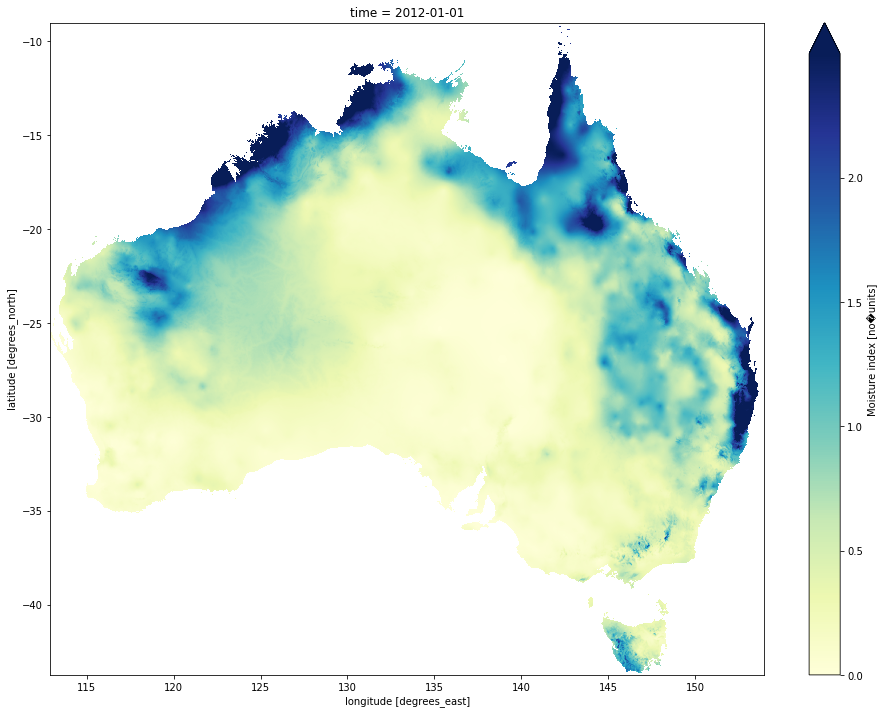

In [6]:
#fig = plt.gcf()
#@savefig
moisture201201.where(moisture201201 != -9999).plot.imshow(vmin=0, robust=True, cmap="YlGnBu", figsize=(16,12))
plt.savefig("2012-01-01-moisture.png")

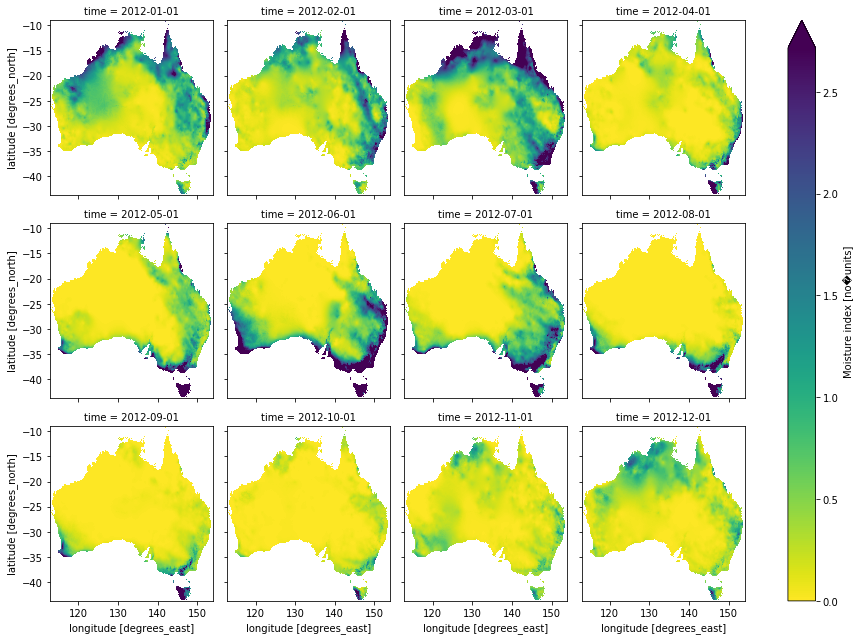

In [46]:
month_strings = ["01","02","03","04","05","06","07","08","09","10","11","12"]
month_moistures = []
for m in month_strings:
    mm = ds.moisture_index.sel(time="2012-"+m).squeeze()
    mm = mm.where(mm!=-9999)
    month_moistures.append(mm)
moisture_xr = xr.concat(month_moistures, dim="time")
moisture_xr.plot.imshow(col='time',col_wrap=4,vmin=0,robust=True,cmap='YlGnBu')

    

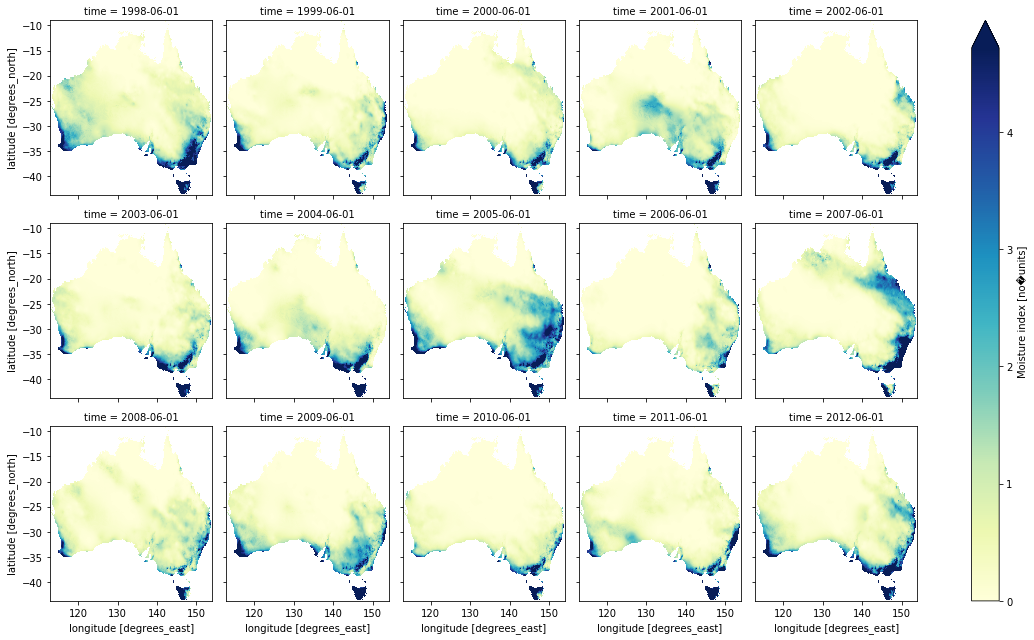

In [60]:
ann06_moistures = []
for y in range(1998,2013):
    am = ds.moisture_index.sel(time=str(y)+"-06").squeeze()
    am = am.where(am!=-9999)
    ann06_moistures.append(am)
ann06_xr = xr.concat(ann06_moistures, dim="time")
ann06_xr.plot.imshow(col='time',col_wrap=5,vmin=0,robust=True,cmap='YlGnBu')


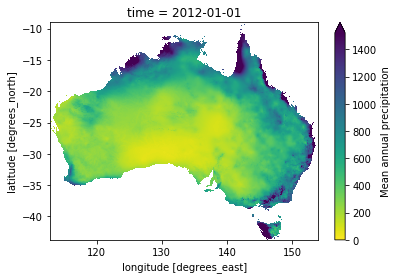

In [34]:
rain.where(rain != -9999).plot.imshow(vmin=0, robust=True, cmap="viridis_r")

In [ ]:
# Plot rainfall starting at zero up to the 98th percentile,
# with the default colormap reversed (low=yellow, high=blue)
rain.where(rain != -9999).plot.imshow(vmin=0, robust=True, cmap="viridis_r")

In [23]:
#help("xarray")
ds?

In [35]:
ds_t = xr.open_dataset(
    "http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/eMAST-R-Package/eMAST-R-Package_v1-1_temperature-mean_yearly_0-01deg_1970-2012",
)
print(f"This is {ds.nbytes/1e9:.2f} gigabytes of data!")
air = ds_t.air_temperature.sel(time="2012").squeeze()
air = air.where(air != -9999)

This is 29.47 gigabytes of data!


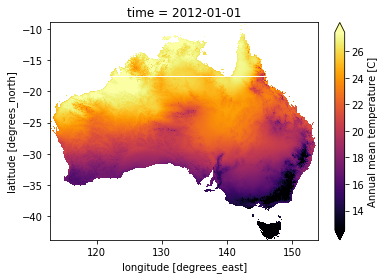

In [36]:
air.plot.imshow(robust=True, cmap="inferno")

Working this one out is left as an excercise for the reader... though I suggest *after* you complete some initial visualisations for your stakeholder.  What would a perfect fix or answer look like for this?  And could you make, and defend to your stakeholder, a much quicker fix?

In [ ]:
# TODO: fix that weird thing in the data, or justify a decision not to.
# Not fixing right now due to time constraints



## Two tricks for visualisation

Hopefully you all remember using the `.isel` method and `slice` objects to select particular regions of interest.
There are many more tricks that are useful for visualising and communicating data,
but for the sake of time I'm only going to demonstrate two here.

#### Alternative colormaps

You may have noticed in the plots above passed a `cmap` argument, 
which changes the way that values are converted into colors.  
You may also have noticed that american english is the *lingua fraca* of code,
so for the sake of interoperability we leave the "u" out of "colour".

There are many ways to select a colormap, as `matplotlib` has historically preferred
adding new features over ensuring that the resulting package is particularly consistent.
The only one we will suggest is to pass the *name* of a colormap as a string, 
optionally postfixed `_r` to reverse it as demonstrated above.

You can see a full [list and visualisation of the default colormaps here](https://matplotlib.org/tutorials/colors/colormaps.html).
Defining custom colormaps is possible but not usually advisable.

In [48]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages (3.0.3)


In [49]:
# Borrowed and condensed from the official colormap tutorial.
# This is why Zac recommends using Xarray, Pandas, and Seaborn to draw your plots.
perceptual_cmap_names = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
fig, axes = plt.subplots(nrows=len(perceptual_cmap_names))
for ax, name in zip(axes, perceptual_cmap_names):
    ax.imshow(np.linspace(0, 1, 256).reshape((1, 256)), aspect='auto', cmap=name)
    ax.text(x=-5, y=0, s=name, fontsize=14, ha="right")
    ax.set_axis_off()

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [ ]:
# What's the most misleading colormap for your data?  Draw some maps here to compare:



#### Using Pandas and Seaborn

Often, we actually want a lower-dimensional summary rather than an image -
in many cases, decisions will actually be based on a single true-or-false
question like "is this measurement above the threshold".
You may therefore want to reduce the two-dimensional data even further,
into one or more pandas Series for final analysis.
Let's use [Seaborn, a fantastic statistical visualisation library](https://seaborn.pydata.org/),
for our last examples:

In [26]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 15.0MB/s ta 0:00:01
    100% |████████████████████████████████| 27.4MB 548kB/s ta 0:00:011    65% |█████████████████████           | 17.9MB 6.9MB/s eta 0:00:02    68% |█████████████████████▉          | 18.7MB 6.1MB/s eta 0:00:02


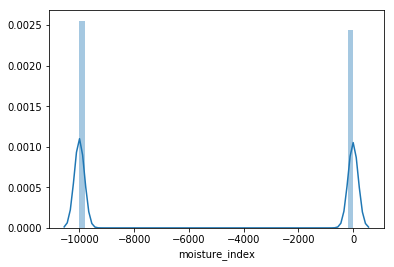

In [27]:
import seaborn
# Convert array to one-dimensional series of observations,
# as Seaborn does not handly explicit missing data.
s = moisture201201.to_series().dropna()
# Then plot the distribution of temperatures:
seaborn.distplot(s)

That took a little while to calculate, but it actually tells us quite a lot about the data too!
For our last demo, let's look at the relationship between mean temperature and total rainfall for 2012, 
without considering location - that is, over the entire continent.

In [38]:
# Our first step is to create an aligned version of our rainfall and temperature grids:
air, rain = xr.align(air, rain)

In [39]:
df = xr.Dataset(dict(
    temperature=air, 
    rainfall=rain.where(rain != -9999),
# We then convert to a DataFrame, drop the singular date coord,
# and drop all rows where either temperature or rainfall are missing.
)).to_dataframe().drop(columns=["time"]).dropna()
df.head()

temperature     rainfall
lat    lon                              
-9.225 142.155    27.814512  1120.994751
       142.165    27.829535  1121.127930
       142.175    27.743643  1121.253662
       142.185    27.652496  1121.371948
       142.235    27.745060  1121.859619

In [40]:
# Some statistical operations can be very slow for all but small datasets,
# and `df` has several million rows.  If things get really slow,
# for example with `kind="kde"`, try using a random sample instead.
some = df.sample(10_000)
len(df), len(some)

(4833250, 10000)

CPU times: user 8.86 s, sys: 509 ms, total: 9.37 s
Wall time: 9.44 s


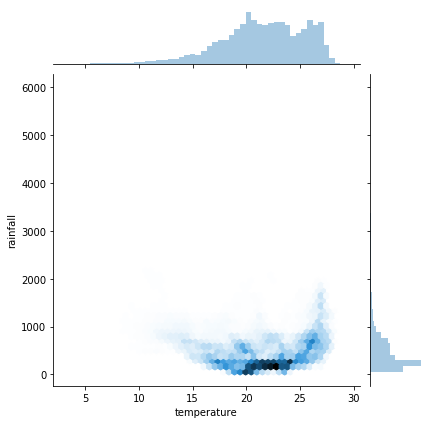

In [41]:
%%time
# `%%time` measures how long it takes to execute the cell.
seaborn.jointplot(
    x="temperature",
    y="rainfall",
    data=df,
    kind="hex",
)

Note that the univariate distribution on top is an excellent match for the temperature distplot we drew before - in fact, it's the same data and the same plot!

There seems to be an awful lot of whitespace in this plot though... perhaps we could fix that?  Two options are to pass `ylim=(0, 1400)` to `jointplot`, which limits the extent of the y-axis to the specified upper and lower bounds; or to explicitly clip our data so we can see the out-of-range values using `data=some.clip(upper=1400)`.  Try each method and see how it looks!  There are of course other options too, if you care to find and justify them...

## Over to you

What important messages are hidden in these data, or the related datasets on NCI, and how will you reveal them to your stakeholders?